- The sinking of the Titanic is one of the most notorious shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

In [1]:
#Importing The Packeges:-

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the DataSet:-

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Our Variable Features:


- PassengerId: Unique number of each passenger.
- Survived: 0 = No, 1 = Yes.
- Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd.
- Name :- Name of the passengers.
- Sex :- 1:Male, 0:Female.
- Age :- Age of the passengers.
- SibSp: Siblings / Spouses Onboard in the Titanic Ship.
- Parch: Parents / Children Onboard in the Titanic Ship.
- Ticket: Ticket number.
- Fare: Passenger fare (Ticket Price).
- Cabin: Cabin number.
- Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

- pclass: A proxy for socio-economic status (SES)
        
      1st = Upper.
      2nd = Middle.
      3rd = Lower.
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5.
- sibsp: The dataset defines family relations in this way...

      Sibling = Brother, Sister, Stepbrother, Stepsister.
      Spouse = Husband, Wife (Mistresses and Fiancés were ignored).
- parch: The dataset defines family relations in this way...

      Parent = Mother, Father.
      Child = Daughter, Son, Stepdaughter, Stepson.
      
      Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
#TO check the shape of the DataSet:-

df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Check basic statistics for each columns:-

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Finding null values columns:-

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age has 177 missing values so we will fill all the age values by using fillna() method.
- Cabin has 687 missing values so we wiil drop the cabin column because it has large number of missing values.
- Embarked has 2 missing values so we will use dropna() method.

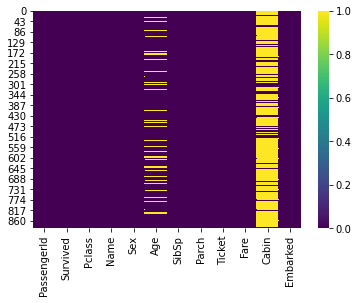

In [7]:
#Visual representation of df.isnull() values:-

sns.heatmap(df.isnull(),data=df,cmap="viridis")
plt.show()

In [8]:
# Drop unnecessory columns from dataset:-

df.drop(["PassengerId","Name","Ticket","Cabin"], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

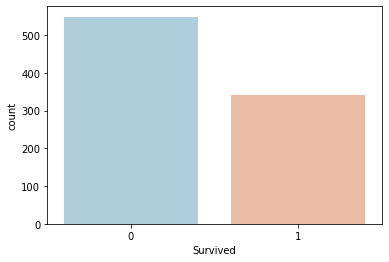

In [10]:
sns.countplot(x="Survived",data=df,palette="RdBu_r")
plt.show()

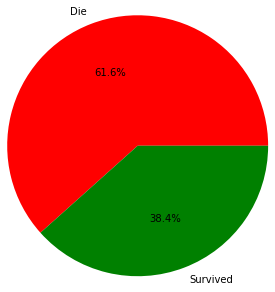

In [11]:
# For Better Visual representation with Pie Chart:-

plt.pie(df["Survived"].value_counts(), labels=["Die","Survived"], colors=['red','green'], autopct='%1.1f%%', radius=1.5)
plt.show()

In [12]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

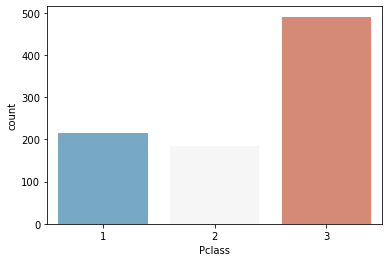

In [13]:
sns.countplot(x="Pclass",data=df,palette="RdBu_r")
plt.show()

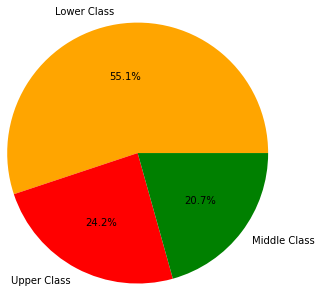

In [14]:
# For Better Visual representation with Pie Chart:-

plt.pie(df["Pclass"].value_counts(), labels=["Lower Class","Upper Class","Middle Class"], colors=["orange","red","green"], autopct='%1.1f%%', radius=1.5)
plt.show()

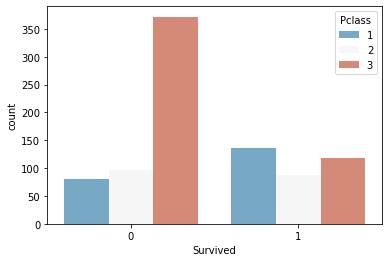

In [15]:
#Countplot on Survived with respect to Pclass:-

sns.countplot(x="Survived",hue="Pclass",data=df,palette="RdBu_r")
plt.show()

- After analysing this the die ratio of lower class peopel is very high.

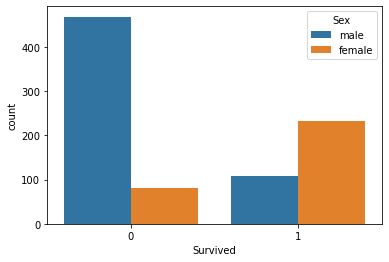

In [16]:
#Countplot on Survived with respect to Sex:-

sns.countplot(x="Survived",hue="Sex",data=df)
plt.show()

- After analysing this the die ratio of Male is Very high. 
- Most of the female survived.

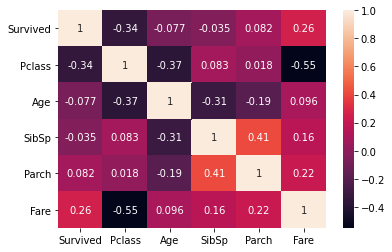

In [17]:
# To check the correlation with the help of Heatmap:-

sns.heatmap(df.corr(), annot =True)
plt.show()

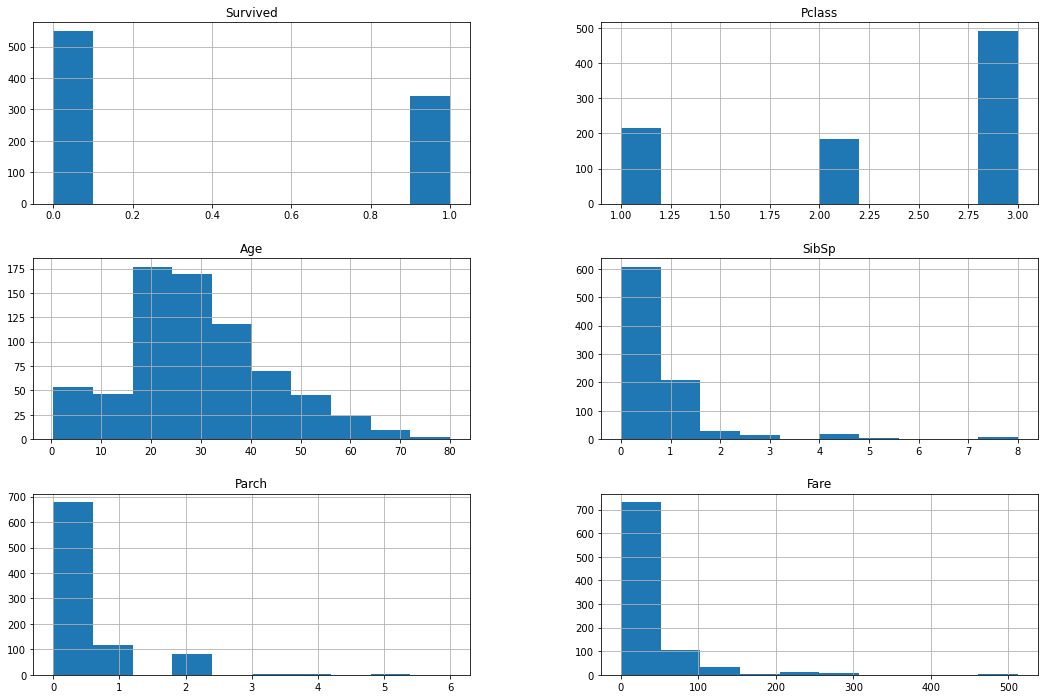

In [18]:
# To check distribution of data and identify outliers:-

df.hist(figsize=(18,12))
plt.show()

- Fare column has some outlier which should be neglected.

- Now, we will fill the Age values using fillna() method.

<AxesSubplot:>

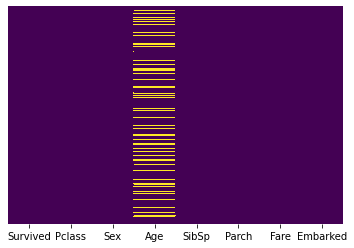

In [19]:
sns.heatmap(df.isnull(), yticklabels=False , cbar=False , cmap='viridis' )

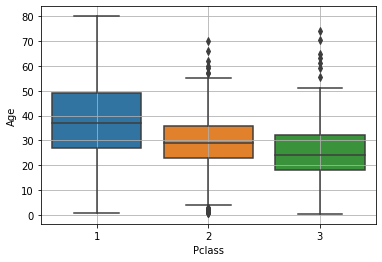

In [20]:
#To check the age with respect to Pclass:-

sns.boxplot(x="Pclass",y="Age",data=df)
plt.grid()

- Pclass 1 is somewhere around 38.
- Pclass 2 is somewhere around 29.
- Pclass 3 is somewhere around 25.
- We will put the age values according to this values.

In [21]:
def fillna(cols):
    pclass = cols[0]
    age = cols[1]
    
    if(pd.isnull(age)):
        if(pclass==1):
            return 38
        elif(pclass==2):
            return 29
        else:
            return 24
    return age

In [22]:
df["Age"]=df[["Pclass","Age"]].apply(fillna,axis=1)

In [23]:
df.dropna(inplace=True)

<AxesSubplot:>

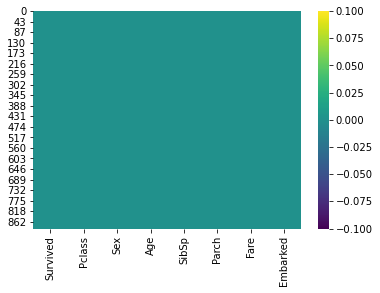

In [24]:
sns.heatmap(df.isnull(),cmap="viridis")

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


- Now, the task is to apply encoders to sex and embarked column to make it numerical column. 

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(["int64","float64"])

In [28]:
for i in df_cat:
    le = LabelEncoder()
    df_cat[i]=le.fit_transform(df_cat[i])

- Done.
- Now Concat the DataSet.

In [29]:
df = pd.concat([df_cat,df_num],axis=1)

# Separation of X and Y.

In [30]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

- Once you have X And Y you will do train test split.

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

- Importing all the necessary models:-

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

from sklearn.svm import SVC
svc = SVC()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

- Here i am using all the models to check the Accuracy and find which model provide us best accuracy for this kind of DataSet.

-  Importing Evaluation Metrics:-

In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [34]:
# Defining a Function:-

def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print(f"Accuracy :- {accuracy_score(ytest,ypred)}")
    print(classification_report(ytest,ypred))
    print(confusion_matrix(ytest,ypred))
    return model

In [35]:
mymodel(logreg)

Accuracy :- 0.7533632286995515
              precision    recall  f1-score   support

           0       0.64      0.74      0.69        82
           1       0.84      0.76      0.80       141

    accuracy                           0.75       223
   macro avg       0.74      0.75      0.74       223
weighted avg       0.76      0.75      0.76       223

[[ 61  21]
 [ 34 107]]


LogisticRegression()

In [36]:
mymodel(knn)

Accuracy :- 0.6771300448430493
              precision    recall  f1-score   support

           0       0.58      0.46      0.51        82
           1       0.72      0.80      0.76       141

    accuracy                           0.68       223
   macro avg       0.65      0.63      0.64       223
weighted avg       0.67      0.68      0.67       223

[[ 38  44]
 [ 28 113]]


KNeighborsClassifier()

In [37]:
mymodel(svc)

Accuracy :- 0.6502242152466368
              precision    recall  f1-score   support

           0       0.56      0.22      0.32        82
           1       0.66      0.90      0.77       141

    accuracy                           0.65       223
   macro avg       0.61      0.56      0.54       223
weighted avg       0.63      0.65      0.60       223

[[ 18  64]
 [ 14 127]]


SVC()

In [38]:
mymodel(dtc)

Accuracy :- 0.726457399103139
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        82
           1       0.80      0.76      0.78       141

    accuracy                           0.73       223
   macro avg       0.71      0.71      0.71       223
weighted avg       0.73      0.73      0.73       223

[[ 55  27]
 [ 34 107]]


DecisionTreeClassifier()

In [39]:
mymodel(rfc)

Accuracy :- 0.7937219730941704
              precision    recall  f1-score   support

           0       0.73      0.70      0.71        82
           1       0.83      0.85      0.84       141

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223

[[ 57  25]
 [ 21 120]]


RandomForestClassifier()

- After analysing all the default models, We wiil tell that the best model for Titanic DataSet is Random Forest Classifier because, It has a best accuracy.

. BEST SCORES 
-  RANDOM FOREST CLASSIFIER HAVE 78% OF ACCURACY.
-  LOGISTIC REGRESSION HAVE 75% OF ACCURACY.
-  DECISION TREE CLASSIFIER HAVE 72% OF ACCURACY.
-  K-NEAREST NEIGHBORS HAVE 68% OF ACCURACY.
-  SUPPORT VECTOR CLASSIFIER HAVE 65% OF ACCURACY.